# Housing Data Preparation and Analysis

### Author : AFANDI Soufiane 
#### Linkedin : https://www.linkedin.com/in/afandi-soufiane/
--------------------------------------------------------------------------------------------------------------------------------------

**Project overview :**

I am using the ***Scrapy framework*** to scrape datasets from websites offering real estate listings for sales and rentals. The goal is to analyze this data and develop a ***Machine Learning*** model that ***suggests*** listings to clients based on their preferences and financial capabilities. 

This involves extracting relevant features from the listings, such as location, price, property type, and amenities, and using these features to train a ***recommendation system***. 

The system will leverage data analysis, data science techniques, and business intelligence to provide personalized and financially feasible real estate options for clients. 

This project aims to enhance the user experience and optimize the property search process, ultimately driving better business outcomes for real estate platforms.


**Current Notebook :**

In this notebook i am going to prepare a dataset that i scrapped using Scrapy Framework from ***Mubawab*** and ***Avito*** website.

- Mubawab is a leading real estate portal for Morocco. Rent, buy and sell with ease thanks to the widest choice of real estate.

- Avito is the number 1 platform for selling and purchasing goods and services.

# 1. Setup Environment

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from datetime import datetime, timedelta
from dateutil import relativedelta

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AFANDI
[nltk_data]     Soufiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
english_stop_words = stopwords.words('english')
french_stop_words = stopwords.words('french')
arabic_stop_words = stopwords.words('arabic')

In [5]:
all_stop_words = english_stop_words+french_stop_words+arabic_stop_words

In [6]:
len(all_stop_words)

1090

**Useful Functions :**

In [7]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [8]:
MOROCCAN_CITIES = [
    "Casablanca", "Rabat", "Fès", "Marrakech", "Agadir", "Tangier", "Meknès",
    "Oujda", "Kenitra", "Tetouan", "Safi", "Khouribga", "Beni Mellal", "El Jadida",
    "Taza", "Nador", "Settat", "Larache", "Ksar El Kebir", "Khemisset", "Guelmim",
    "Errachidia", "Berkane", "Taourirt", "Bouskoura", "Fquih Ben Salah", "Oued Zem",
    "El Kelaa Des Sraghna", "Sidi Slimane", "Guercif", "Oulad Teima", "Ben Guerir",
    "Tifelt", "Lqliaa", "Taroudant", "Sefrou", "Essaouira", "Fnideq", "Sidi Kacem",
    "Tiznit", "Tan-Tan", "Ouarzazate", "Souk El Arbaa", "Youssoufia", "Lahraouyine",
    "Martil", "Ain Harrouda", "Skhirat", "Ouazzane", "Benslimane", "Al Hoceima",
    "Beni Ansar", "M'diq", "Sidi Bennour", "Midelt", "Azrou", "Drargua", "Chefchawn",
    "Zagora", "El Aioun Sidi Mellouk", "Lagouira", "Ras El Ain", "Sidi Ali Ben Hamdouche",
    "Sebt Jahjouh", "Tiddas", "Zaouiat Bougrin", "Tafersit", "Touissit", "Saidia",
    "Lalla Takarkoust", "Skhinate", "Moulay Brahim", "Soualem", "Gueznaia", "Moulay Yacoub",
    "Sidi Allal Tazi", "Laakarta", "Alnif", "Dar El Kebdani", "Jebha", "Ain Erreggada",
    "Sidi Addi", "Skoura", "Smimou", "Ain Jemaa", "Timahdite", "Aït Dawd", "Souk EL Had",
    "Had Bouhssoussen", "Oulad Said", "Arbaoua", "Ain Dorij", "Madagh", "Tighza", "Matmata",
    "Kourouna"
]

# 2. Import Data

In [9]:
file_path = 'market housing full data exported at 23-05-2024 - mubawab and avito.csv'
columns = ["advertisement_url", "title", "publication_date", "price", "location", "features_list", 
           "insert_date", "ad_type", "description", "complete_description"]

In [10]:
mh_dataset = pd.read_csv(file_path, quotechar='#', escapechar='\\', delimiter='|', engine='python',on_bad_lines='skip', header=None)
mh_dataset.columns = columns
mh_dataset.head(3)

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...
1,https://www.mubawab.ma/fr/a/7808420/beach-suns...,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains...,Nouvel appartement luxueux et relaxant de 2 ch...
2,https://www.mubawab.ma/fr/a/6343021/appartemen...,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...,"Charmant et luxueux studio, entièrement meublé..."


**Overview :** 

The above dataset that i have scrapped using Scrapy Framework took me 3-4 days (~ 1h per day = 3-4 hours in general), on two real estate websites in Morroco (Avito - Mubawab), just to start using data cleaning process so that i can automate this process in the future.

**Data Description :**

This dataset contains :

- *<u>advertisement_url</u>* : Which is the full URL of the page in the website on which i retrieve detailed information on the current real estate announcement.

- *<u>title</u>* : The title of the property advertisement.

- *<u>publication_date</u>* : The date the advertisement was published by its owner.

- *<u>price</u>* : The price of the property (in ***DH*** = Moroccan ***D***ir***H***am : the official monetary currency of Morocco).

- *<u>location</u>* : The exact location of the property.

- *<u>description</u>* : Detail parts of the property.
 
- *<u>complete_description</u>* : Complete description of the property established by its owner.

- *<u>features_list</u>* : A liste of The property type (Apartment, House, Villa, farmhouse, ...),  property state, number of floors ...

- *<u>insert_date</u>* : The Date the current announcement was scrapped.

In [11]:
mh_dataset.shape

(7897, 10)

In [12]:
mh_dataset.isnull().sum()

advertisement_url          0
title                      0
publication_date           0
price                      0
location                   0
features_list              0
insert_date                0
ad_type                 2145
description             2145
complete_description       0
dtype: int64

**Notice :**

The 2149 rows which have null value in 'description' field, were caused because of the scrape failure. (Scrapy can't scrap svg element ... but i still work on it for future updates, trying to solve it using Selenium with Scrapy).

In [13]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   advertisement_url     7897 non-null   object
 1   title                 7897 non-null   object
 2   publication_date      7897 non-null   object
 3   price                 7897 non-null   object
 4   location              7897 non-null   object
 5   features_list         7897 non-null   object
 6   insert_date           7897 non-null   object
 7   ad_type               5752 non-null   object
 8   description           5752 non-null   object
 9   complete_description  7897 non-null   object
dtypes: object(10)
memory usage: 617.1+ KB


# 3. Data Cleaning

## 3.1 Remove duplicate records

We'll start by checking overall duplicates records in my dataset.

In [14]:
sum(mh_dataset.duplicated())

0

We found **no duplicate records** in our dataset, but **I believe this does not reflect reality**. If two records are essentially the same but differ in just one field <i>**[**<u>which in this case is going to be 'advertisement_url</u>**]**</i>, they are not identified as duplicates. In practice, some people **repost** their real estate ads multiple times on these websites, causing them to appear multiple times for visitors.

In [15]:
sum(mh_dataset['advertisement_url'].duplicated())

1550

we found 1110 duplicate records.

In [16]:
mh_dataset = mh_dataset[~mh_dataset['advertisement_url'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [17]:
sum(mh_dataset['advertisement_url'].duplicated())

0

Let's delve deeper into our dataset and examine other columns for potential duplicates. I will focus on the 'title' column because individuals tend to repost the same ad multiple times with identical or very similar titles. By analyzing this column, we might identify records that are essentially duplicates despite differences in other fields.

In [18]:
sum(mh_dataset['title'].duplicated())

444

As we say, we found 210 duplicate records.

In [19]:
mh_dataset[mh_dataset['title'].duplicated()]

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
133,https://www.mubawab.ma/fr/a/7920370/bel-appart...,Bel appartement en location de vacances,Publié aujourdhui,1 200 DH,Agdal à Marrakech,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 12:00:14,Vacation Rentals,87 m² ;4 Pièces;2 Chambres;2 Salles de bains;...,Bel appartement en location de vacances se com...
191,https://www.mubawab.ma/fr/a/7859057/joli-appar...,Joli appartement à louer,Publié il y a 1 jour,400 DH par jour,Centre Ville à Mohammedia,Type de bien;Appartement;Etat ;Nouveau;Orienta...,2024-05-23 12:08:00,Vacation Rentals,60 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Important je loue tout mes appartements juste ...
217,https://www.mubawab.ma/fr/a/7919438/appartemen...,Appartement Familiale Centre Ville Vue Sur Plage,Publié il y a 1 jour,400 DH par jour,De La Plage à Tanger,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 12:11:35,Vacation Rentals,95 m² ;5 Pièces;3 Chambres;2 Salles de bains;...,Appartement Location Vacances Centre Ville De ...
255,https://www.mubawab.ma/fr/a/7894867/villa-rte-...,Villa Rte Ourika Piscine Privée 8 Pers,Publié il y a 2 jours,2 500 DH,Route de l'Ourika à Marrakech,Type de bien;Villa;Etat ;Nouveau,2024-05-23 12:16:40,Vacation Rentals,200 m² ;5 Pièces;4 Chambres;2 Salles de bains...,Référence : 24OLVS031 Nom : Villa Rte Ourika E...
292,https://www.mubawab.ma/fr/a/7918275/appartemen...,Appartement haut standing 2BR,Publié il y a 3 jours,600 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Nouveau,2024-05-23 12:22:25,Vacation Rentals,70 m² ;2 Pièces;2 Chambres;1 Salle de bain;Ca...,Nous mettons en location journalière un appart...
...,...,...,...,...,...,...,...,...,...,...
6241,https://www.avito.ma/fr/hay_salam/locations_de...,Appartement,il y a 4 heures,250 DH /Nuit,Agadir,"Type;Locations de vacances, à louer;Secteur;Ha...",2024-05-21 00:00:00,NaN,NaN,très belle appartement 2 chambre et un salon m...
6254,https://www.avito.ma/fr/gu%C3%A9liz/locations_...,appart à centre de guéliz,il y a 4 heures,250 DH /Nuit,Marrakech,"Type;Locations de vacances, à louer;Secteur;Gu...",2024-05-21 00:00:00,NaN,NaN,Marrakech Excellence vous propose des appartem...
6290,https://www.avito.ma/fr/ain_sebaa/appartements...,Appartement à vendre 78 m² à Casablanca,il y a 4 heures,850 000 DH,Casablanca,"Type;Appartements, à vendre;Secteur;Ain Sebaa;...",2024-05-21 00:00:00,NaN,NaN,Opportunité à ne pas raterappartement sur ain ...
6291,https://www.avito.ma/fr/gu%C3%A9liz/appartemen...,appartement à vendre,il y a 4 heures,1 400 000 DH,Marrakech,"Type;Appartements, à vendre;Secteur;Guéliz;Âge...",2024-05-21 00:00:00,NaN,NaN,appartement double voie Guliez proche de la ga...


**As we notice here, there are duplicate records. and it must be deleted so as not to distort our analysis in the future.**

In [20]:
mh_dataset = mh_dataset[~mh_dataset['title'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [21]:
sum(mh_dataset['title'].duplicated())

0

We have finished our examination using the 'title' column. Now, let's move on to analyzing the 'description' column. This analysis might help us identify additional duplicates, as individuals who repost their ads often use the same or very similar descriptions.

Note: We are not examining the 'price,' 'surface,' 'location,' or 'publication_date' columns because multiple real estate listings can have the same price, surface area, location, or publication date.

In [22]:
sum(mh_dataset['description'].duplicated())

3296

In [23]:
mh_dataset[mh_dataset['description'].duplicated()][:2]

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
28,https://www.mubawab.ma/fr/a/7810811/studio-cha...,Studio Chaleureux au Cœur de la Ville,Publié aujourdhui,17 999 DH,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du...,2024-05-23 11:45:38,Vacation Rentals,30 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...,Ce charmant studio offre une atmosphère chaleu...
30,https://www.mubawab.ma/fr/a/7808651/apartment-...,Apartment confort d'une chambre Gauthier,Publié aujourdhui,20 399 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:46:00,Vacation Rentals,40 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,"Séjournez dans un lieu haut de gamme, proche d..."


**The "description" column is not as reliable as the "title" column for detecting duplicate records. As we observed earlier, even when two records have the same "description," they can still be different ads. Therefore, relying on the "description" column might not be effective for identifying duplicates in our dataset.**

## 3.2 remove '\n' and '\t' characters in the dataset

===> This code bloc is disabled for future commits ... because, i've automated this data cleaning process inside the spider using **ItemLoaders**.

In [24]:
# mh_dataset['title'] = mh_dataset['title'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['publication_date'] = mh_dataset['publication_date'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['price'] = mh_dataset['price'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['location'] = mh_dataset['location'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['description'] = mh_dataset['description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['complete_description'] = mh_dataset['complete_description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['features_list'] = mh_dataset['features_list'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))

## 3.3 Fix the shifted values issue in some lines

===> This problem may appear sometimes...so it is necessary to check and resolve it.

In [25]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...
1,https://www.mubawab.ma/fr/a/7808420/beach-suns...,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains...,Nouvel appartement luxueux et relaxant de 2 ch...
2,https://www.mubawab.ma/fr/a/6343021/appartemen...,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...,"Charmant et luxueux studio, entièrement meublé..."
3,https://www.mubawab.ma/fr/a/7808661/appartemen...,Appartement élégant avec terrasse ensoleillée,Publié aujourdhui,799 DH par jour,CIL (Hay Salam) à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du...,2024-05-23 11:42:19,Vacation Rentals,50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Découvrez notre suite de luxe située au sommet...
4,https://www.mubawab.ma/fr/a/7810556/appartemen...,Appartement de 1 chambre ensoleillé à Gauthier,Publié aujourdhui,899 DH par jour,Gauthier à Casablanca,Type de bien;Appartement;Etat ;Bon état;Type d...,2024-05-23 11:42:41,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Séjournez dans un lieu haut de gamme et spacie...


In [26]:
# check if there is some records with this issue by executing this command line ...
sum(mh_dataset['insert_date'].isna())

0

----------------------------------------------------------------------------------------------------
(***!***) **As what we can notice here :** 
- That "*insert_data*" value is "*NaN*", but in reality it's in the wrong field "*features_list*".
- Also the field "*complete_description*" has the value of "*features_list*" field.
- and so on ...

so from the "*price*" field until "*insert_date*" field, the values were shifted.

to solve this issue we gonna use the next code bloc:

In [27]:
def is_shifted(row):
    """
    Check if current line is shifted or not.
    """
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    
    if str(row['insert_date']) == 'nan' and re.match(r"^\d{4}-\d{2}-\d{2}$" , str(row['features_list'])):
        return True
    return False

In [28]:
 def fix_shift(row):
        row.loc["price": "insert_date"] = row.loc["price": "insert_date"].shift(1)
        row.loc["price"] = "nan" 
        return row

In [29]:
def detect_and_fix_shifted_rows(dataframe):
    corrected_df = dataframe.copy()
    for index, row in dataframe.iterrows():
        if is_shifted(row):
            corrected_df.loc[index] = fix_shift(row)
    
    return corrected_df

In [30]:
print("Original DataFrame:")
mh_dataset.head()

Original DataFrame:


,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...
1,https://www.mubawab.ma/fr/a/7808420/beach-suns...,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains...,Nouvel appartement luxueux et relaxant de 2 ch...
2,https://www.mubawab.ma/fr/a/6343021/appartemen...,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...,"Charmant et luxueux studio, entièrement meublé..."
3,https://www.mubawab.ma/fr/a/7808661/appartemen...,Appartement élégant avec terrasse ensoleillée,Publié aujourdhui,799 DH par jour,CIL (Hay Salam) à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du...,2024-05-23 11:42:19,Vacation Rentals,50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Découvrez notre suite de luxe située au sommet...
4,https://www.mubawab.ma/fr/a/7810556/appartemen...,Appartement de 1 chambre ensoleillé à Gauthier,Publié aujourdhui,899 DH par jour,Gauthier à Casablanca,Type de bien;Appartement;Etat ;Bon état;Type d...,2024-05-23 11:42:41,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Séjournez dans un lieu haut de gamme et spacie...


In [31]:
if sum(mh_dataset['insert_date'].isna()) > 0 :
    mh_dataset = detect_and_fix_shifted_rows(mh_dataset)
    print("\nCorrected DataFrame:")
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...
1,https://www.mubawab.ma/fr/a/7808420/beach-suns...,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains...,Nouvel appartement luxueux et relaxant de 2 ch...
2,https://www.mubawab.ma/fr/a/6343021/appartemen...,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...,"Charmant et luxueux studio, entièrement meublé..."
3,https://www.mubawab.ma/fr/a/7808661/appartemen...,Appartement élégant avec terrasse ensoleillée,Publié aujourdhui,799 DH par jour,CIL (Hay Salam) à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du...,2024-05-23 11:42:19,Vacation Rentals,50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Découvrez notre suite de luxe située au sommet...
4,https://www.mubawab.ma/fr/a/7810556/appartemen...,Appartement de 1 chambre ensoleillé à Gauthier,Publié aujourdhui,899 DH par jour,Gauthier à Casablanca,Type de bien;Appartement;Etat ;Bon état;Type d...,2024-05-23 11:42:41,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Séjournez dans un lieu haut de gamme et spacie...


In [32]:
sum(mh_dataset['insert_date'].isna())

0

## 3.4 'advertisement_url' column cleaning

**Summary :**

- **Add** "website_name" column based on current column 'advertisement_url'.
- **Visualize** the number of records per website name.

In [33]:
mh_dataset['advertisement_url']

0       https://www.mubawab.ma/fr/a/7808436/arribat-ce...
1       https://www.mubawab.ma/fr/a/7808420/beach-suns...
2       https://www.mubawab.ma/fr/a/6343021/appartemen...
3       https://www.mubawab.ma/fr/a/7808661/appartemen...
4       https://www.mubawab.ma/fr/a/7810556/appartemen...
                              ...                        
5898    https://www.avito.ma/fr/khemisset/terrains_et_...
5899    https://www.avito.ma/fr/iris/locations_de_vaca...
5900    https://www.avito.ma/fr/a%C3%AFn_diab/appartem...
5901    https://www.avito.ma/fr/sidi_maarouf/apparteme...
5902    https://www.avito.ma/fr/sidi_hajjaj_oued_hassa...
Name: advertisement_url, Length: 5903, dtype: object

**The first step I will take is to gather the website names and create a new column in the dataset to indicate the website each ad belongs to. This additional information can help us better analyze and manage the data.**

In [34]:
mh_dataset['website_name'] = mh_dataset['advertisement_url'].apply(lambda x: x.split('.')[1])

In [35]:
mh_dataset['website_name'].describe()

count        5903
unique          2
top       mubawab
freq         3912
Name: website_name, dtype: object

In [36]:
mh_dataset['website_name'].unique()

array(['mubawab', 'avito'], dtype=object)

In [37]:
highest_count  =  {
    "name" : "avito",
    "value": mh_dataset[mh_dataset['website_name'] == 'avito'].shape[0]
}

lowest_count = {
    "name" : "mubawab",
    "value": mh_dataset[mh_dataset['website_name'] == 'mubawab'].shape[0]
}

r = (100 * (highest_count["value"] - lowest_count["value"])) / highest_count["value"]

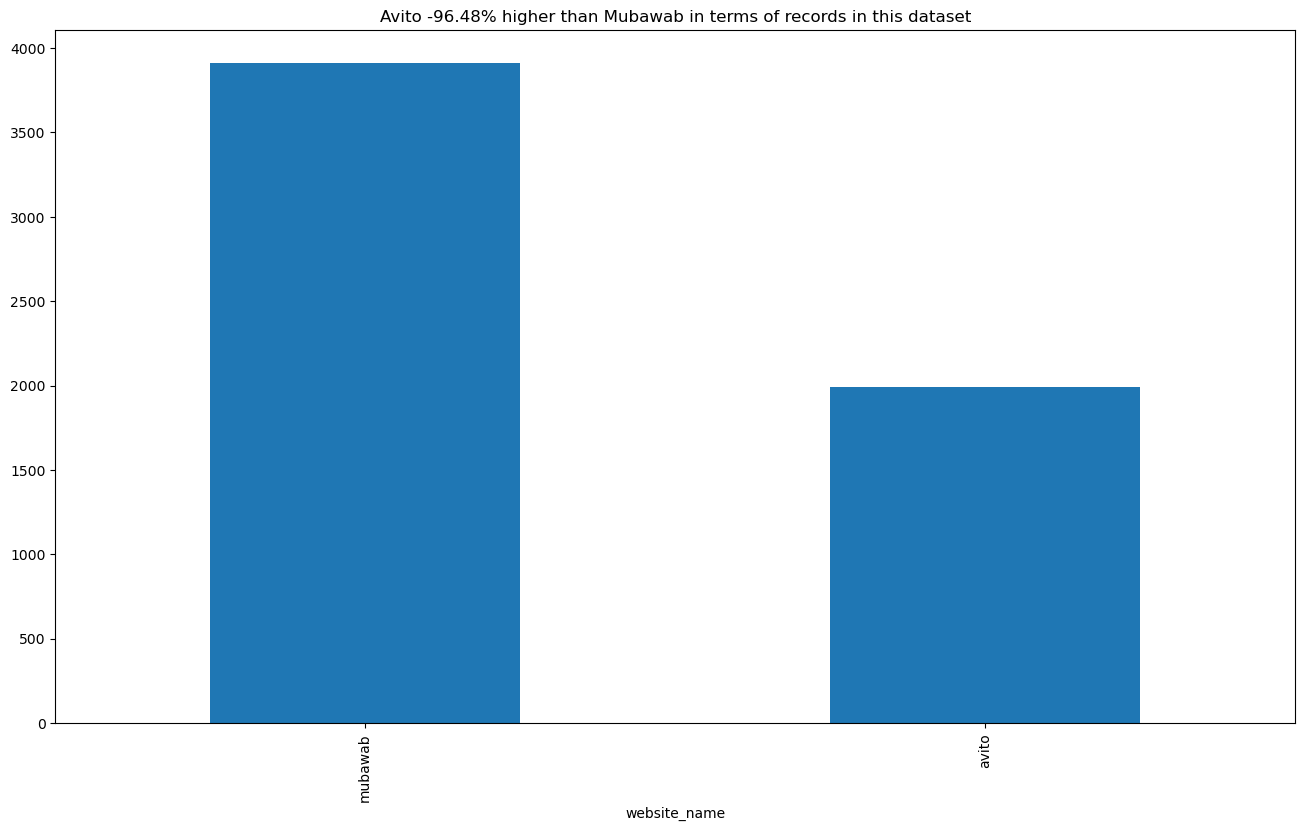

In [38]:
mh_dataset['website_name'].value_counts().plot(kind='bar')
plt.title(f"{highest_count['name'].capitalize()} {round(r, 2)}% higher than {lowest_count['name'].capitalize()} in terms of records in this dataset")
plt.show()

In [39]:
mh_dataset.rename(columns={"advertisement_url": "url"}, inplace=True)

## 3.5 'title' column cleaning

**Summary :**

- **Add** 'ad_type' column based on current column 'title', 'feature_list' column and 'price'.
- **Add** 'property_type' column based on current column 'title' and 'feature_list' column.
- **Add** 'property_surface_from_title_m²' column based on current column 'title'.

   --> so we can keep surface information if not exist in "feature_list" column.

- **Analyze** all titles by counting the most appeared words.
- **Analyze** the new column 'roperty_surface_from_title_m²', and gather new insight from it.

In [40]:
mh_dataset['title']

0           Arribat Center Appartement 1 chambres balcon 
1               Beach Sunset View Appartement 2 chambres 
2                         Appartement au coeur de Maârif 
3          Appartement élégant avec terrasse ensoleillée 
4         Appartement de 1 chambre ensoleillé à Gauthier 
                              ...                        
5898                              ferme en Vente barashwa
5899                    Appartements familiale à côté CHU
5900                PENTHOUSE à louer à MARINA CASABLANCA
5901         Appartement haut standing 70 m² à Casablanca
5902    Maison 2 Niveaux 121m2 Sidi Hajjaj Tit Mellil ...
Name: title, Length: 5903, dtype: object

### 3.5 - 1/ Counting Unique Words :

I will create a "word counts" dictionary which will contain all ***unique words*** as keys and ***their occurrences*** as values.

This step will give us an ***overall overview*** of the titles in this dataset.

In [41]:
def get_unique_words(list, stop_words):
    # Combine all texts into one
    combined_text = " ".join(list)

    # Converte text to lowercase to ensure word comparison is not case sensitive + delete any character that is not a letter, number, or space.
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text.lower())

    # Retrieve all words in the test
    words = combined_text.split()

    # Count the occurrences of each word
    unique_words_dict = Counter(words)

    filtered_dict = {key: value for key, value in unique_words_dict.items() if key not in stop_words}
    
    return filtered_dict

In [42]:
unique_words_from_titles = dict(get_unique_words(list(mh_dataset['title']), all_stop_words))

In [43]:
len(unique_words_from_titles)

3050

In [44]:
unique_words_from_titles = {k: v for k, v in unique_words_from_titles.items() if v>1 and not has_numbers(k) and k.capitalize() not in MOROCCAN_CITIES }

In [45]:
len(unique_words_from_titles)

1025

In [46]:
sorted_unique_words_from_titles = sorted(unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

In [47]:
sorted_unique_words_from_titles

[('appartement', 3270),
 ('m²', 1281),
 ('louer', 1215),
 ('vendre', 1114),
 ('location', 980),
 ('chambres', 839),
 ('villa', 543),
 ('meublé', 519),
 ('vente', 439),
 ('asilah', 407),
 ('vacances', 398),
 ('surface', 386),
 ('pièces', 340),
 ('appartements', 339),
 ('studio', 311),
 ('bel', 297),
 ('salon', 275),
 ('terrasse', 273),
 ('vue', 268),
 ('piscine', 247),
 ('résidence', 240),
 ('saisonnière', 236),
 ('porte', 220),
 ('blindée', 214),
 ('centre', 209),
 ('hay', 195),
 ('superficie', 192),
 ('totale', 187),
 ('antenne', 187),
 ('parabolique', 187),
 ('jardin', 187),
 ('ascenseur', 177),
 ('ville', 167),
 ('marocain', 162),
 ('mer', 159),
 ('belles', 157),
 ('neuf', 157),
 ('belle', 155),
 ('agréables', 141),
 ('terrain', 141),
 ('chambre', 135),
 ('superbe', 133),
 ('standing', 132),
 ('appart', 125),
 ('sécurisée', 124),
 ('parking', 124),
 ('confortables', 119),
 ('luxe', 117),
 ('tanger', 114),
 ('double', 111),
 ('haut', 110),
 ('grandes', 105),
 ('vitrage', 105),
 ('mag

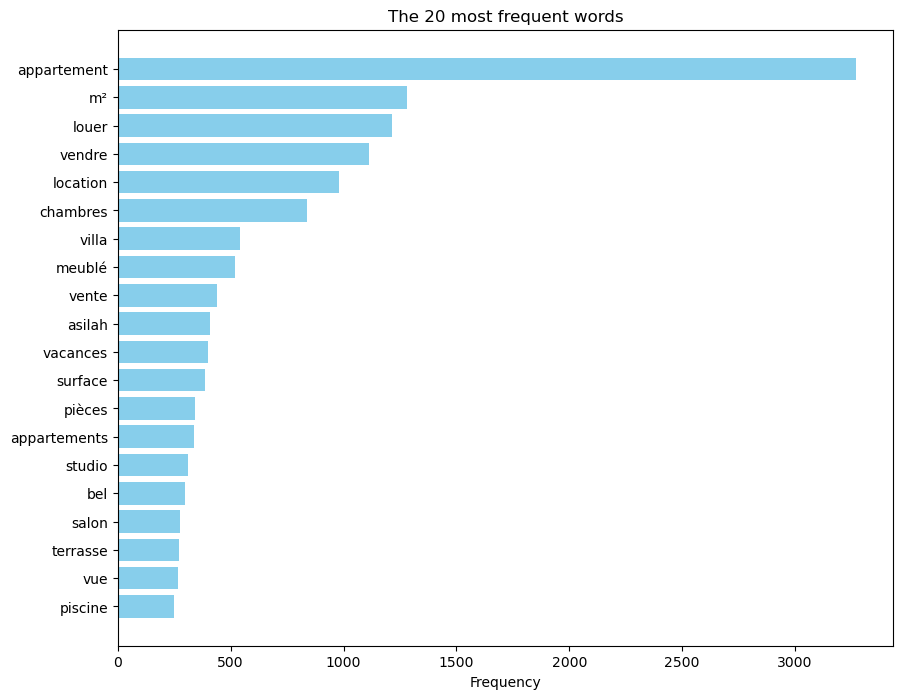

In [48]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

In [49]:
from wordcloud import WordCloud

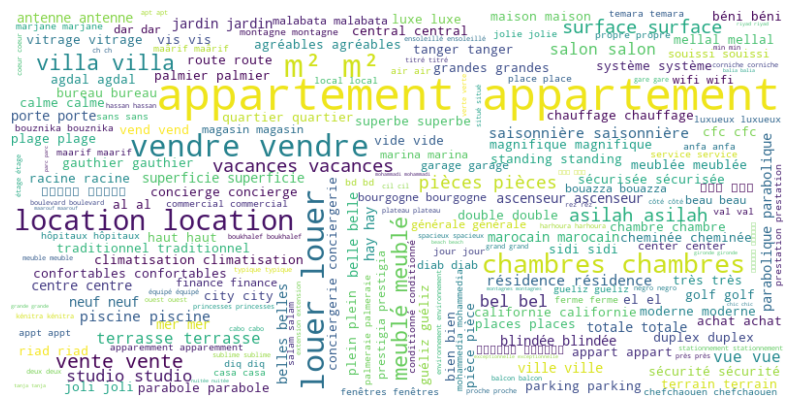

In [50]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
specific_stop_words = {"m²", "bel", "al", "el", "très", "bien", "hay","haut","belles","quartier","eden","vue","belle","badr","sidi","db","rak","racine","في","pièces","magnifique","beau","mhd","val","agréable","hills","lot","apparemment","plein","route","jnane"}

In [52]:
sorted_unique_words_from_titles = {key: value for key, value in dict(sorted_unique_words_from_titles).items() if key not in specific_stop_words}
sorted_unique_words_from_titles = sorted(sorted_unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

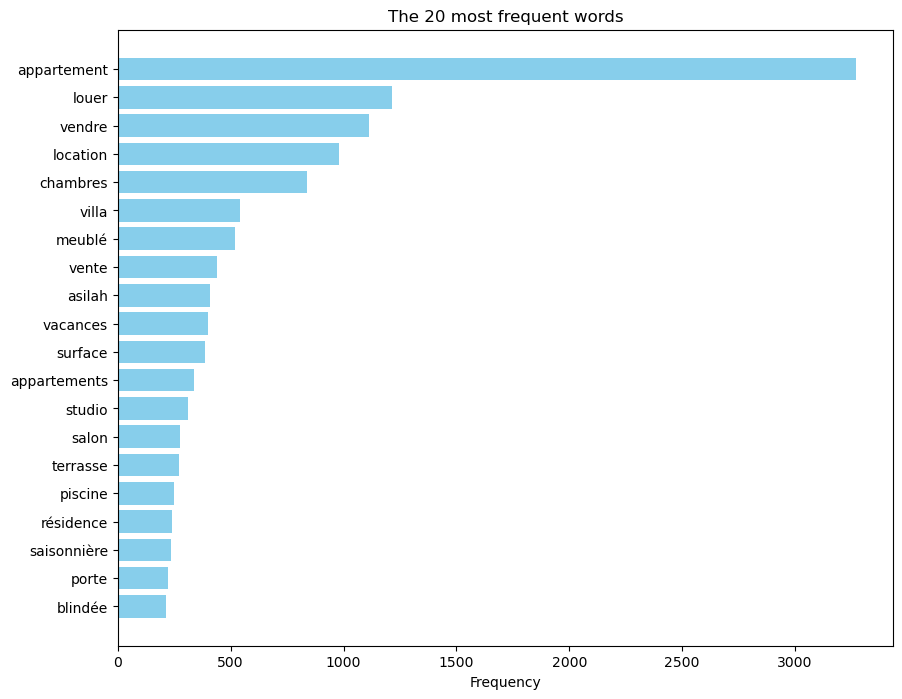

In [53]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

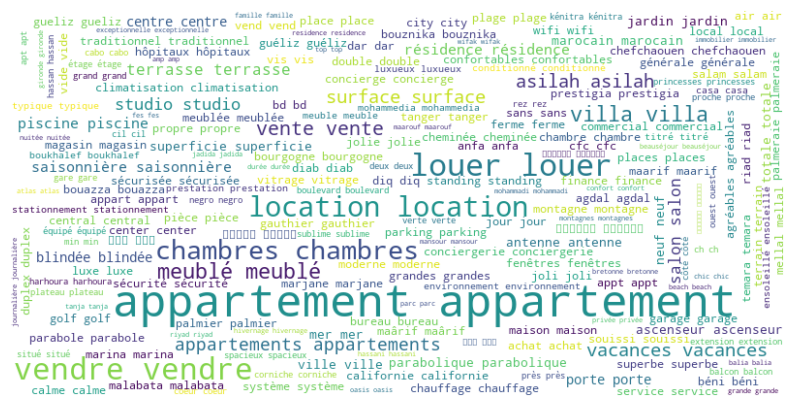

In [54]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3.5 - 2/ Extract the type of the ad (Sale/Rental/Vocation Rental) from the title AND JUST FOR AVITO RECORS:

because, We have scraped data from the Mubawab platform in an organized manner, as the sales, rental, and vacation rental announcements are categorized separately. BUT ON AVITO PLATFORM, announcements are not orginized so we need to extract the type of the announcement.

In [55]:
# def extract_ad_type_based_on_title_and_features_list_and_price_columns(title, features_list, price, dictionary):
    
#     # IF the type of advertisement concerns the “Sale” of real estate. 
#     words = title.lower().split()
#     #     search for sales words entered by users ...
#     for word in words:
#         normalized_word = dictionary.get(word, None)
#         if normalized_word:
#             return normalized_word

#     # IF NOT A SALE AD, we are going to check if it's a Rental Vocation Ad.
#     if 'night' in price.lower() or 'day' in price.lower() or 'nuit' in price.lower() or 'jour' in price.lower() or 'vacance' in title.lower() or 'locations de vacances' in features_list.lower():
#         return 'Vacation Rentals'

#     if 'location' in title.lower() or 'loue' in title.lower() or 'rent' in title.lower() or 'rent' in features_list.lower() or 'location' in features_list.lower():
#         return 'Rentals'
        
#     return 'Others'

In [56]:
def extract_ad_type(title, features_list, price, complete_description):
    
    # IF the type of advertisement concerns the “Sale” of real estate. 
    sales_keywords = ['sell', 'sels', 'sells', 'sold', 'selling', 'sale', 'sall', 'vend', 'vent']
    if any(keyword in title.lower() for keyword in sales_keywords) or any(keyword in features_list.lower() for keyword in sales_keywords) or any(keyword in complete_description.lower() for keyword in sales_keywords):
        return 'Sales'
    
    # Check for vacation rental keywords in price, features list and title columns.
    price_keywords = ['night', 'day', 'nuit', 'jour']
    if any(keyword in price.lower() for keyword in price_keywords) or 'vacance' in title.lower() or 'locations de vacances' in features_list.lower():
        return 'Vacation Rentals'

    # Check for rental keywords in title and features list
    rental_keywords = ['location', 'loue', 'rent', "كراء"]
    if any(keyword in title.lower() for keyword in rental_keywords) or any(keyword in features_list.lower() for keyword in rental_keywords):
        return 'Rentals'

    if 'locations de vacances' in complete_description.lower() or 'Vacation Rentals' in complete_description.lower():
        return 'Vacation Rentals'

    if any(keyword in complete_description.lower() for keyword in rental_keywords):
        return 'Rentals'
        
    return 'Others'

In [57]:
mh_dataset['ad_type'] = mh_dataset.apply(lambda row: extract_ad_type(row['title'], row['features_list'], row['price'], row['complete_description']) if row['website_name'] == 'avito' else row['ad_type'], axis=1)

<Axes: xlabel='ad_type'>

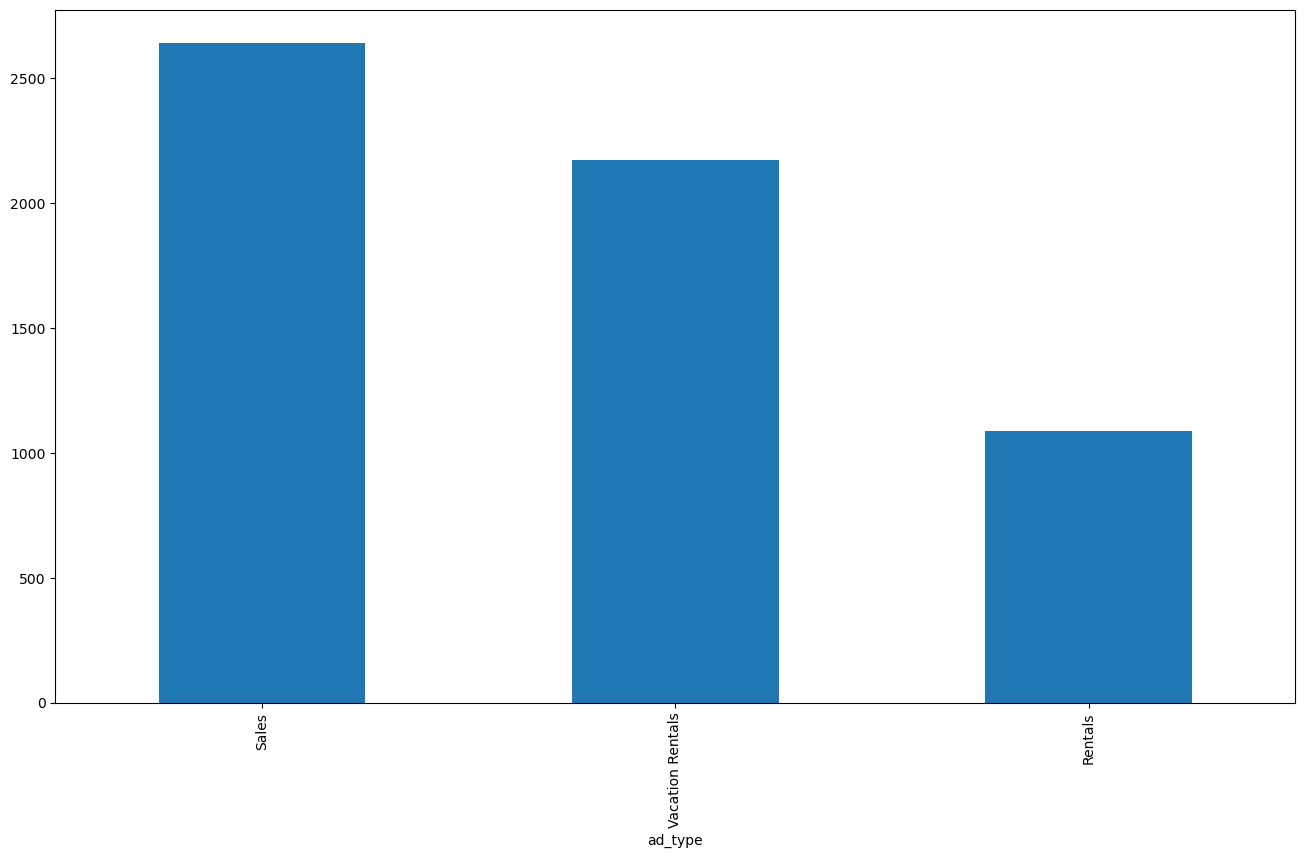

In [58]:
mh_dataset['ad_type'].value_counts().plot(kind="bar")

### 3.5 - 3/ Extract the surface of the property:

In [59]:
def extract_property_surface(title, description, complete_description):
    try :
        property_surface_pattern = r'\b(\d+)\s*m²\b'
        match = re.search(property_surface_pattern, title)
        if match:
            return int(match.group(0).split("m²")[0].replace(" ", ""))
    except:
        pass

    try:
        match = re.match(r'\b\w*[;,]?(\d+\s*m²)\b', description)
        if match:
            return re.findall(r'\d+', match.group())[0]
    except:
        pass

    try:
        match = re.match(r'\b\w*[;,]?(\d+\s*m²)\b', complete_description)
        if match:
            return re.findall(r'\d+', match.group())[0]
    except:
        pass
        
    return None

In [60]:
mh_dataset['property_surface_m²'] = mh_dataset.apply(lambda row: extract_property_surface(row['title'], row['description'], row['complete_description']), axis=1)

In [61]:
mh_dataset['property_surface_m²'].describe()

count     1521.000000
mean       189.628534
std       1355.848950
min          4.000000
25%         75.000000
50%         92.000000
75%        125.000000
max      50000.000000
Name: property_surface_m², dtype: float64

In [62]:
sum(mh_dataset['property_surface_m²'].isna()), len(mh_dataset['property_surface_m²'])

(4382, 5903)

In [63]:
mh_dataset[['property_surface_m²', 'website_name']].head(3)

,property_surface_m²,website_name
0,NaN,mubawab
1,NaN,mubawab
2,NaN,mubawab


In [64]:
sub_set = mh_dataset[['property_surface_m²', 'website_name']]

In [65]:
sub_set = sub_set[sub_set['property_surface_m²']  < 1000 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


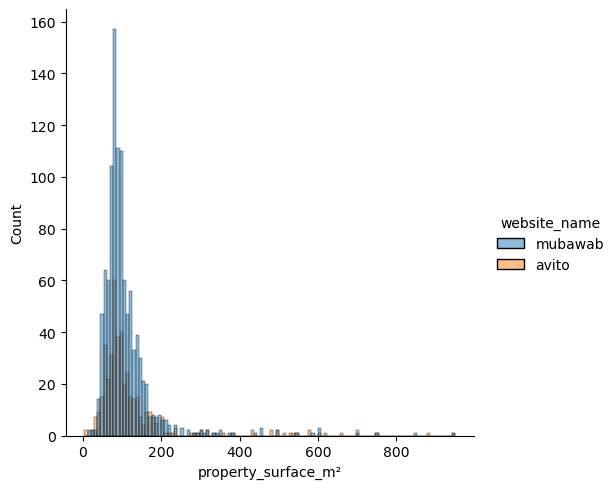

In [66]:
sns.displot(sub_set, x='property_surface_m²', hue='website_name')

In [67]:
sub_set = sub_set[sub_set['property_surface_m²']  < 300 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

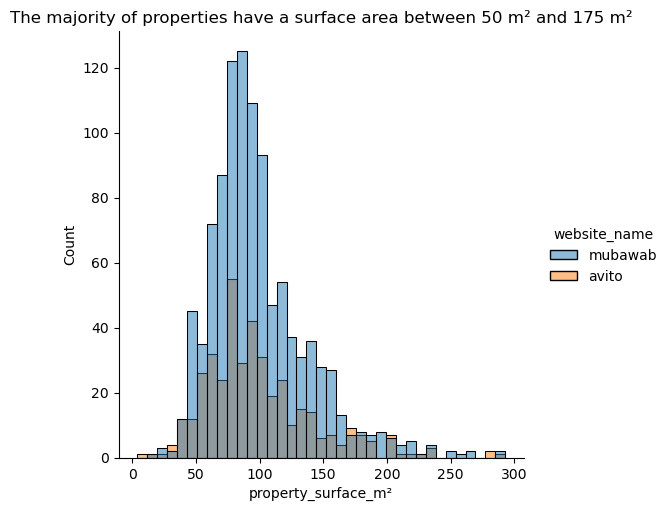

In [68]:
sns.displot(sub_set, x='property_surface_m²', hue='website_name')
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

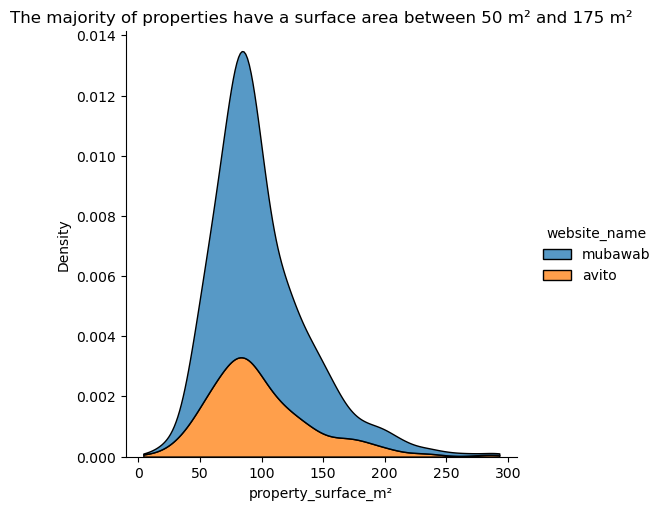

In [69]:
# Kernel density estimation
sns.displot(sub_set, x='property_surface_m²', hue='website_name', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

### 3.5 - 4/ Extract the type of the property:

In [70]:
mh_dataset.head(1)

,url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...,mubawab,NaN


In [71]:
def extract_property_type(title, features_list):
    title__ =  title.lower()
    features_list__ = features_list.lower()

    apartments_keywords = ['apartment', 'apart', 'aprt', 'aprtmnt', 'aprtment', 'apprt', 'appartement', 'appartment', 'duplex', 'triplex', 'studio', 'شقة']
    land_and_farms_keywords = ['land', 'farm', 'terrain', 'terain', 'teran', 'ferm', 'firm', 'ranche', 'أرض', 'مزرعة']
    houses_keywords = ['house', 'hous', 'maison', 'cottage', 'chalet', 'منزل']
    villas_riads_keywords = ['villa', 'vila', 'riad', 'riyad', 'ryad', 'castle', 'château', 'فيلا', 'رياض']
    desks_keywords = ['desktop', 'desk', 'desc', 'disk', 'bureau', 'office', 'مكتب']
    flatsharing_keywords = ['flatsharing', 'flatshar', 'colocation', 'roommate', 'romate', 'roommat', 'roomat']
    warehouse_keywords = ['magasin', 'store', 'stor', 'warehouse', 'warehous', 'warehouse', 'storehouse', 'magazine', 'magazin', 'مستودع']

    
    if any(keyword in title__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in title__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in title__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in title__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in title__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in title__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in title__ for keyword in warehouse_keywords):
        return "Warehouses"
    elif any(keyword in features_list__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in features_list__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in features_list__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in features_list__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in features_list__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in features_list__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in features_list__ for keyword in warehouse_keywords):
        return "Warehouses"
    else:
        return "Other Real Estate"

In [72]:
mh_dataset['property_type'] = mh_dataset.apply(lambda row: extract_property_type(row['title'], row['features_list']), axis=1)

In [73]:
unique_property_type_values = mh_dataset['property_type'].unique()
unique_property_type_values

array(['Apartments', 'Villas and Riads', 'Houses', 'Other Real Estate',
       'Land and Farms', 'Desks', 'Flatsharing', 'Warehouses'],
      dtype=object)

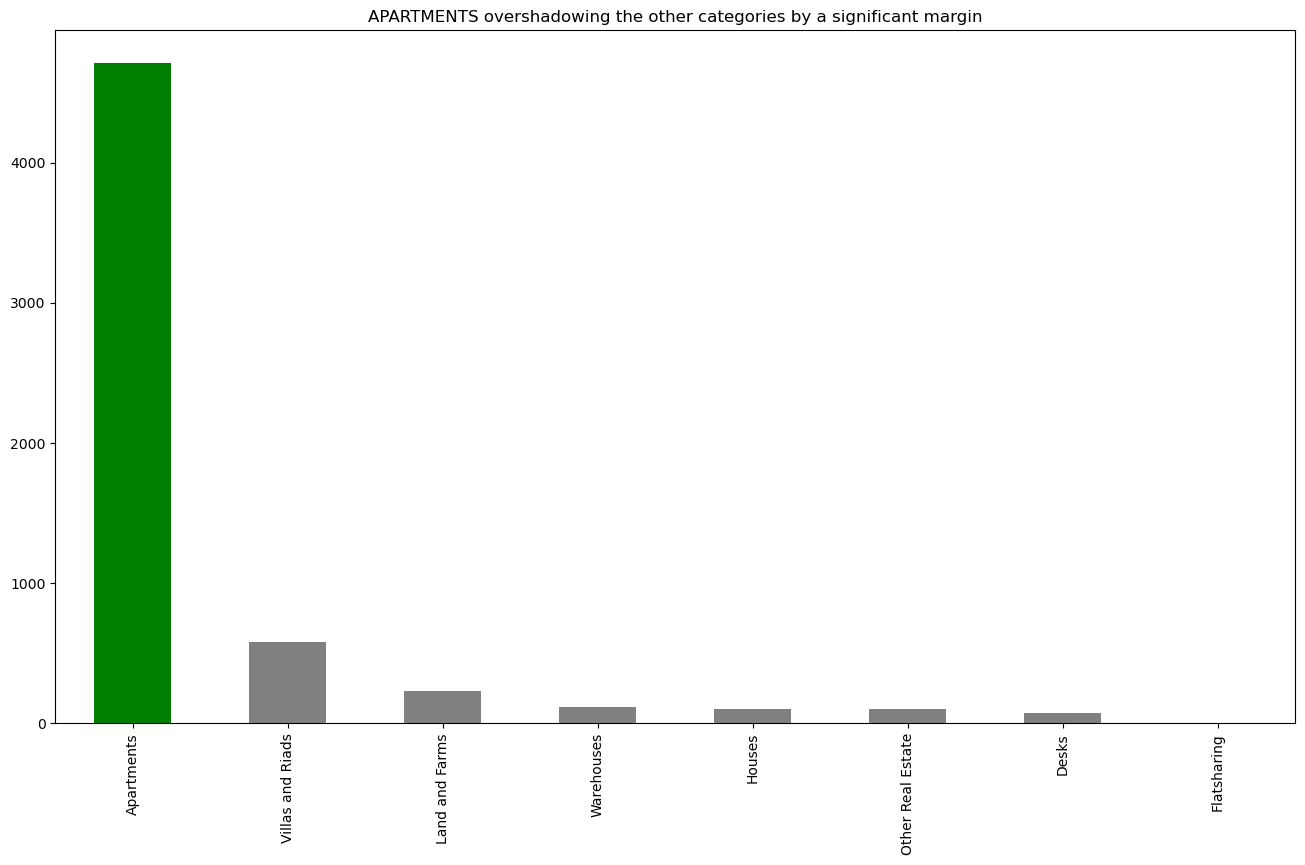

In [74]:
colors = ["g"] + ["gray"] * (len(unique_property_type_values)-1)
mh_dataset['property_type'].value_counts().plot(kind="bar", xlabel="", color=colors)
plt.title("APARTMENTS overshadowing the other categories by a significant margin")
plt.show()

In [75]:
mh_dataset.head(1)

,url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...,mubawab,NaN,Apartments


## 3.6 'publication_date' column cleaning

**Summary :**

- Added year, month, day of publication columns based on current column 'publication_date' and 'insert_date'.

In [76]:
mh_dataset['publication_date']

0       Publié aujourdhui
1       Publié aujourdhui
2       Publié aujourdhui
3       Publié aujourdhui
4       Publié aujourdhui
              ...        
5898      il y a 5 heures
5899      il y a 5 heures
5900      il y a 5 heures
5901      il y a 5 heures
5902      il y a 5 heures
Name: publication_date, Length: 5903, dtype: object

In [77]:
mh_dataset['publication_date'].unique()

array(['Publié aujourdhui', 'Publié il y a 1 jour',
       'Publié il y a 4 jours', 'Publié il y a 3 jours',
       'Publié il y a 2 jours', 'Publié il y a 1 semaine',
       'Publié il y a 5 jours', 'Publié il y a 2 semaines',
       'Publié il y a 3 semaines', 'Publié il y a 4 semaines',
       'Publié il y a 1 mois', 'Publié il y a 2 mois',
       'Publié il y a 3 mois', 'Publié il y a 4 mois',
       'Publié il y a 5 mois', 'il y a 8 minutes', 'il y a 9 minutes',
       'il y a 21 minutes', 'il y a 26 minutes', 'il y a 20 minutes',
       'il y a 24 minutes', 'il y a 18 minutes', 'il y a 16 minutes',
       'il y a 33 minutes', 'il y a 28 minutes', 'il y a 29 minutes',
       'il y a 31 minutes', 'il y a 30 minutes', 'il y a 36 minutes',
       'il y a 37 minutes', 'il y a 41 minutes', 'il y a 35 minutes',
       'il y a 32 minutes', 'il y a 43 minutes', 'il y a 40 minutes',
       'il y a 45 minutes', 'il y a 39 minutes', 'il y a 42 minutes',
       'il y a 50 minutes', 'il y a 44

In [78]:
def convert_to_datetime(pub_date, insert_date):
    insert_date = insert_date.split(" ")[0]
    current_date = datetime.strptime(insert_date, "%Y-%m-%d")
    
    if 'aujourdhui' in pub_date:
        return current_date
        
    num_match = re.search(r'\d+', pub_date)
    if not num_match:
        return np.nan
    
    num = int(num_match.group())

    current_date = current_date + timedelta(hours=23, minutes=59) 
    if 'minute' in pub_date:
        return current_date - timedelta(minutes=num)
    elif 'heure' in pub_date or 'hour' in pub_date:
        return current_date - timedelta(hours=num)
    elif 'jour' in pub_date or 'day' in pub_date:
        return current_date - timedelta(days=num)
    elif 'semaine' in pub_date or 'week' in pub_date:
        return current_date - timedelta(weeks=num)
    elif 'mois' in pub_date or 'month' in pub_date:
        return current_date - relativedelta.relativedelta(months=num)
    elif 'année' in pub_date or 'year' in pub_date:
        return current_date - relativedelta.relativedelta(years=num)
    else:
        return np.nan

In [79]:
mh_dataset.rename(columns={'publication_date': 'ad_date'}, inplace=True)

In [80]:
mh_dataset.apply(lambda x: convert_to_datetime(x['ad_date'], x['insert_date']), axis=1)

0      2024-05-23 00:00:00
1      2024-05-23 00:00:00
2      2024-05-23 00:00:00
3      2024-05-23 00:00:00
4      2024-05-23 00:00:00
               ...        
5898   2024-05-21 18:59:00
5899   2024-05-21 18:59:00
5900   2024-05-21 18:59:00
5901   2024-05-21 18:59:00
5902   2024-05-21 18:59:00
Length: 5903, dtype: datetime64[ns]

In [81]:
mh_dataset['ad_date'] = mh_dataset.apply(lambda x: convert_to_datetime(x['ad_date'], x['insert_date']), axis=1)

In [82]:
mh_dataset['year'] = mh_dataset['ad_date'].apply(lambda x: x.year)
mh_dataset['month'] = mh_dataset['ad_date'].apply(lambda x: x.month)
mh_dataset['day'] = mh_dataset['ad_date'].apply(lambda x: x.day)

In [83]:
mh_dataset['ad_date'] = mh_dataset['ad_date'].apply(lambda x: str(x).split()[0])

In [84]:
mh_dataset.head(1)

,url,title,ad_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type,year,month,day
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,2024-05-23,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...,mubawab,NaN,Apartments,2024,5,23


## 3.7 'price' column cleaning

**Summary :**

- **add** 'property_price', 'price_currency', 'price per priod (for rental ad)' columns based on the current one.

In [85]:
mh_dataset['price']

0                                  849 DH par jour 
1       1 999 DH par jour   Baisse du prix 401 DH  
2                                  500 DH par jour 
3                                  799 DH par jour 
4                                  899 DH par jour 
                           ...                     
5898                              Prix non spécifié
5899                                   250 DH /Nuit
5900                                      45 000 DH
5901                                     880 000 DH
5902                                   1 200 000 DH
Name: price, Length: 5903, dtype: object

In [86]:
mh_dataset['price'].unique()

array(['849 DH par jour ', '1 999 DH par jour   Baisse du prix 401 DH  ',
       '500 DH par jour ', ..., '11 000 000 DH', '38 490 650 DH',
       '45 000 DH'], dtype=object)

As we have noticed, there are multiple forms of price descriptions in our dataset:

- **Regular Form**: The price of the property followed by its currency (e.g., "1000 DH").

- **Rental Form**: For rental ads, the price may be specified per night. This can appear directly like the regular form (e.g., "150 DH") or with an additional string at the end of the price (e.g., "150 DH/Nuit" or "150 DH/Night").

- **Unspecified Price**: Sometimes, the ad owner does not specify the price, either for sale or rental, and this is indicated by strings like "Prix non spécifié" or left blank ("").

To handle these variations, we will standardize the price descriptions in our dataset, ensuring consistency and improving data quality.

In [87]:
def extract_price(price_description):
    
    # Patterns to match each different price descriptions
    regular_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*', re.IGNORECASE)
    rental_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*/\s*(\w+)\s*', re.IGNORECASE)
    unspecified_patterns = [re.compile(r'\s*prix\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*price\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*prix\s*à\s*consulter\s*', re.IGNORECASE),
                            re.compile(r'\s*gratuit\s*', re.IGNORECASE),
                            re.compile(r'\s*free\s*', re.IGNORECASE),
                            re.compile(r'^\s*$')]

    # Check for unspecified price first
    for pattern in unspecified_patterns:
        if pattern.match(price_description):
            return {'price': None, 'currency': None}

    # Check for rental form
    rental_match = rental_pattern.match(price_description)
    if rental_match:
        price, currency, period = rental_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'period': period}

    # Check for regular form
    regular_match = regular_pattern.match(price_description)
    if regular_match:
        price, currency = regular_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency}

    return {'price': None, 'currency': None}

In [88]:
mh_dataset['price'].apply(lambda x: extract_price(x)).tolist()

[{'price': 849, 'currency': 'DH'},
 {'price': 1999, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 799, 'currency': 'DH'},
 {'price': 899, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 800, 'currency': 'DH'},
 {'price': 200, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 500, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 600, 'currency': 'DH'},
 {'price': 450, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 1000, 'currency': 'DH'},
 {'price': 15000, 'currency': 'DH'},
 {'price': 350, 'currency': 'DH'},
 {'price': 400, 'currency': 'DH'},
 {'price': 1000, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 500, 'currency': 'DH'},
 {'price': 400, 'currency': 'DH'},
 {'price': 700, 'currency': 'DH'},
 {'price': 2000, 'currency': 'DH'},
 {'price': 999, 'currency': 'DH'},
 {'price': 799, 'currency': 'DH'},
 {'price': 799, 'currency': 'DH'},
 {'price': 

In [89]:
extracted_prices = pd.DataFrame(mh_dataset['price'].apply(lambda x: extract_price(x)).tolist())
extracted_prices.columns = ['property_price', 'price_currency', 'price_per_priod_(for_rental_ad)']
extracted_prices

,property_price,price_currency,price_per_priod_(for_rental_ad)
0,849.0,DH,NaN
1,1999.0,DH,NaN
2,500.0,DH,NaN
3,799.0,DH,NaN
4,899.0,DH,NaN
...,...,...,...
5898,NaN,None,NaN
5899,250.0,DH,Nuit
5900,45000.0,DH,NaN
5901,880000.0,DH,NaN


In [90]:
mh_dataset = mh_dataset.join(extracted_prices)
mh_dataset.head(2)

,url,title,ad_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type,year,month,day,property_price,price_currency,price_per_priod_(for_rental_ad)
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,2024-05-23,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...,mubawab,NaN,Apartments,2024,5,23,849.0,DH,NaN
1,https://www.mubawab.ma/fr/a/7808420/beach-suns...,Beach Sunset View Appartement 2 chambres,2024-05-23,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains...,Nouvel appartement luxueux et relaxant de 2 ch...,mubawab,NaN,Apartments,2024,5,23,1999.0,DH,NaN


In [91]:
del mh_dataset['price']

## 3.8 'location' column cleaning

**Summary :**

- **Clean** current column.
- **Visualize** data + **insight gathering**.

In [92]:
mh_dataset['location']

0                      Agdal à Rabat 
1       Secteur Touristique à Agadir 
2                Maârif à Casablanca 
3       CIL (Hay Salam) à Casablanca 
4              Gauthier à Casablanca 
                    ...              
5898                        Khemisset
5899                            Oujda
5900                       Casablanca
5901                       Casablanca
5902          Sidi Hajjaj Oued Hassar
Name: location, Length: 5903, dtype: object

In [93]:
mh_dataset['location'].unique()

array(['Agdal à Rabat ', 'Secteur Touristique à Agadir ',
       'Maârif à Casablanca ', 'CIL (Hay Salam) à Casablanca ',
       'Gauthier à Casablanca ', 'Tanja Balia à Tanger ', 'Cabo Negro ',
       'Oulfa à Casablanca ', 'Sidi Abbad à Marrakech ',
       'Sala el Jadida à Salé ', 'Laäyoune ', 'Anfa à Casablanca ',
       'Riad Al Atlas à Marrakech ', 'Amelkis à Marrakech ',
       'Guéliz à Marrakech ', 'Achakar à Tanger ',
       'Belvédère à Casablanca ', 'Racine à Casablanca ',
       'Palmier à Casablanca ', 'Agdal à Marrakech ',
       'Douar Dlam à Marrakech ', 'Quartier du Parc à Mohammedia ',
       'Asilah ', 'Tanger City Center à Tanger ', 'Martil ',
       'Hay Mabrouka à Marrakech ', 'Marjane à Meknes ', "M'Diq ",
       "Route de l'Ourika à Marrakech ", 'Bourgogne Est à Casablanca ',
       "Triangle d'Or à Casablanca ", 'Hay Mohammadi à Agadir ',
       'Castilla à Tanger ', 'Dar Bouazza ', 'De La Plage à Tanger ',
       'El Mansouria ', 'Béni Yakhlef ', 'Hay Salam à

In [94]:
def extract_city_from_location(location):
    if 'à' in location:
        return location.split('à')[-1].strip()
    else:
        return location.strip()

In [95]:
mh_dataset['location']

0                      Agdal à Rabat 
1       Secteur Touristique à Agadir 
2                Maârif à Casablanca 
3       CIL (Hay Salam) à Casablanca 
4              Gauthier à Casablanca 
                    ...              
5898                        Khemisset
5899                            Oujda
5900                       Casablanca
5901                       Casablanca
5902          Sidi Hajjaj Oued Hassar
Name: location, Length: 5903, dtype: object

In [96]:
mh_dataset['location'] = mh_dataset['location'].apply(lambda x: extract_city_from_location(x))

In [97]:
unique_cities = mh_dataset['location'].unique()
unique_cities

array(['Rabat', 'Agadir', 'Casablanca', 'Tanger', 'Cabo Negro',
       'Marrakech', 'Salé', 'Laäyoune', 'Mohammedia', 'Asilah', 'Martil',
       'Meknes', "M'Diq", 'Dar Bouazza', 'El Mansouria', 'Béni Yakhlef',
       'Mehdia', 'Fès', 'Sidi Bouknadel', 'Sidi Rahal Chatai',
       'El Jadida', 'Al Hoceima', 'Oujda', 'Essaouira', 'Azrou',
       'Taghazout', 'Ourika', 'Chefchaouen', 'Lagfifat', 'Béni Mellal',
       'Moulay Bousselham', 'Bouznika', 'Saïdia', 'Harhoura',
       'Sidi Bouzid', 'Kénitra', 'Skhirat', 'Safi', 'Oualidia', 'Temsia',
       'Benslimane', 'Tétouan', 'Ouislane', 'Ifrane', 'Sidi Rahal',
       'Oued Laou', 'Taroudant', 'Bouskoura', 'Larache', 'Nador',
       'Sidi Abdallah Ghiat', 'Aguerd', 'Sidi Ghanem', 'Agafay', 'Temara',
       'Tamesna', 'Laaouama', "M'sick", 'Tiznit', 'Al Barkanyene',
       'Berkane', 'Taghzout', 'Dakhla', 'Harbil', 'Errachidia',
       'Azemmour', 'Fnideq', 'Had Soualem', 'Ksar Sghir', 'Boukhalef',
       'Ouarzazate', 'Ain Attig', 'Sidi Mo

In [98]:
city_normalize = {
"طنجة" : "Tanger",
"Meknes" : "Meknès",
"القنيطرة" : "Kénitra",
"تمارة" : "Temara",
"مراكش" : "Marrakech",
"أكادير" : "Agadir",
"فاس" : "Fès",
"الدار البيضاء" : "Casablanca"
}

In [99]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))
print(sum(mh_dataset['location'] == "أكادير"))
print(sum(mh_dataset['location'] == "فاس"))
print(sum(mh_dataset['location'] == "الدار البيضاء"))

2
40
1
1
4
1
1
1


In [100]:
 mh_dataset['location'] = mh_dataset['location'].apply(lambda x: city_normalize[x] if x in city_normalize.keys() else x)

In [101]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))
print(sum(mh_dataset['location'] == "أكادير"))
print(sum(mh_dataset['location'] == "فاس"))
print(sum(mh_dataset['location'] == "الدار البيضاء"))

0
0
0
0
0
0
0
0


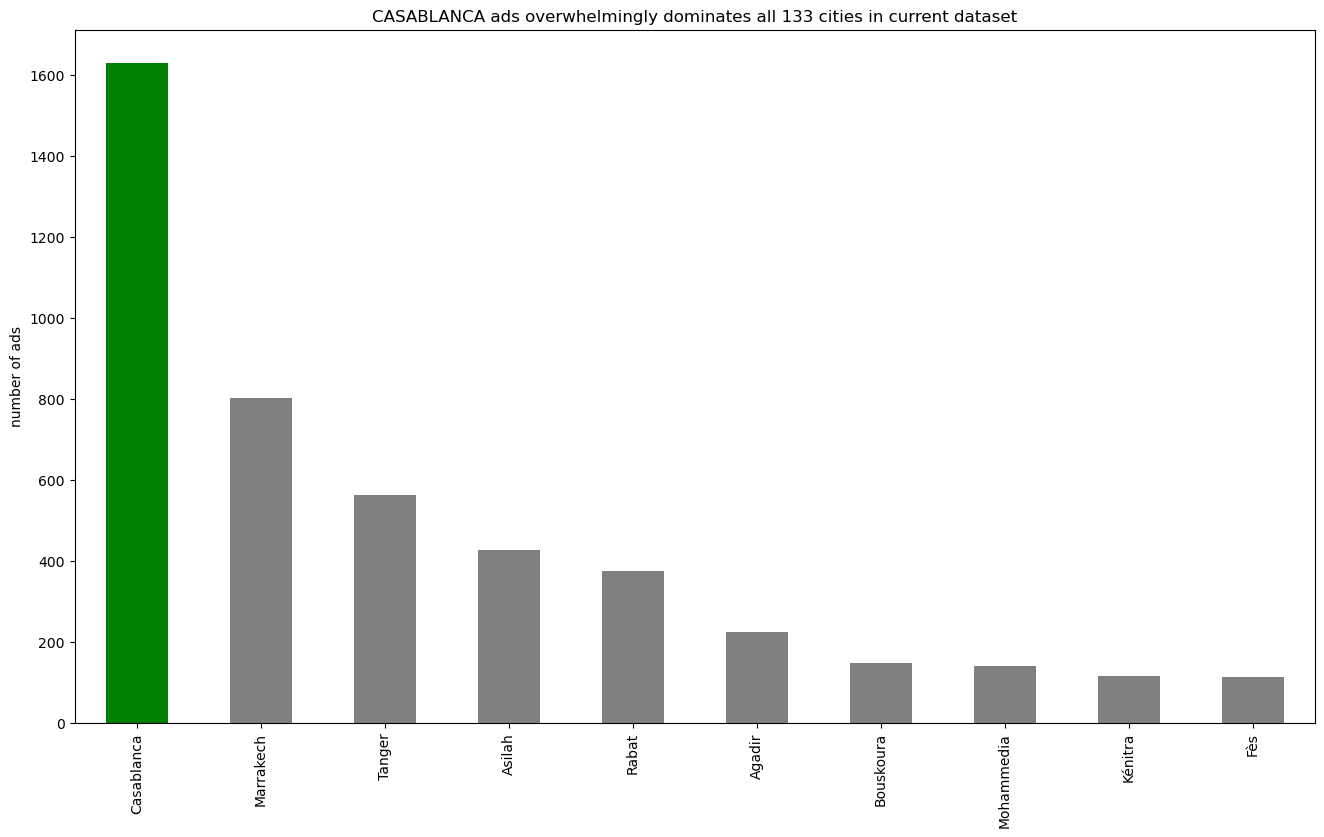

In [102]:
top_10_locations_in_current_dataset = mh_dataset['location'].value_counts().head(10)
colors = ['g'] + ['gray'] * (len(top_10_locations_in_current_dataset)-1)
top_10_locations_in_current_dataset.plot(kind="bar", xlabel='', ylabel='number of ads', color=colors)
plt.title(f'{top_10_locations_in_current_dataset.keys()[0].upper()} ads overwhelmingly dominates all {len(unique_cities)} cities in current dataset')
plt.show()

## 3.9 'description' column cleaning

**Summary :**

- **Add** 'number of rooms' column.

In [103]:
mh_dataset['description']

0        48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...
1        120 m² ;3 Pièces;2 Chambres;2 Salles de bains...
2        60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...
3        50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...
4        48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...
                              ...                        
5898                                                  NaN
5899                                                  NaN
5900                                                  NaN
5901                                                  NaN
5902                                                  NaN
Name: description, Length: 5903, dtype: object

One of the most meaningful insight from this list of property descriptions is: 
the number of rooms.

So, let's extract this number.

In [104]:
mh_dataset['description']

0        48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...
1        120 m² ;3 Pièces;2 Chambres;2 Salles de bains...
2        60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Cap...
3        50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...
4        48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...
                              ...                        
5898                                                  NaN
5899                                                  NaN
5900                                                  NaN
5901                                                  NaN
5902                                                  NaN
Name: description, Length: 5903, dtype: object

In [105]:
def extract_rooms_number(description):
    description = str(description)
    if description == "":
        return np.nan
    
    pieces_match = re.search(r'(\d+)\s*Pièces?', description)
    if pieces_match:
        return int(pieces_match.group(1))
    
    chambres_match = re.search(r'(\d+)\s*Chambres?', description)
    if chambres_match:
        return int(chambres_match.group(1))
    
    return np.nan

In [106]:
mh_dataset['rooms_number'] = mh_dataset['description'].apply(lambda x: extract_rooms_number(x) )

In [107]:
mh_dataset['rooms_number'].describe()

count    3898.000000
mean        3.238840
std         2.428693
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        99.000000
Name: rooms_number, dtype: float64

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


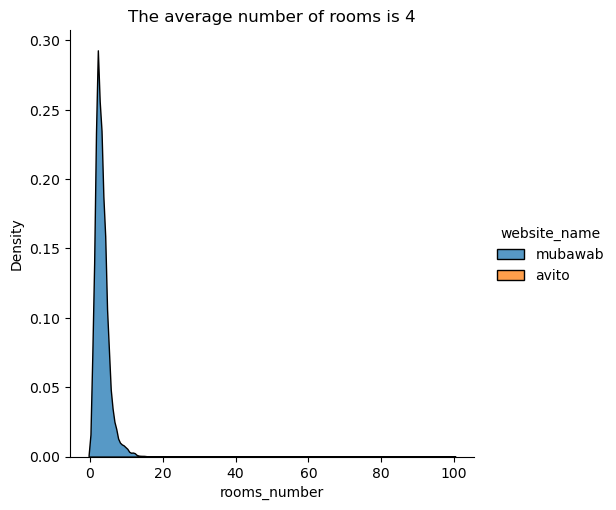

In [108]:
sns.displot(mh_dataset, x='rooms_number', hue='website_name', kind="kde", multiple="stack")
plt.title("The average number of rooms is 4")
plt.show()

# 4. More Cleaning

In [109]:
mh_dataset.head(1)

,url,title,ad_date,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type,year,month,day,property_price,price_currency,price_per_priod_(for_rental_ad),rooms_number
0,https://www.mubawab.ma/fr/a/7808436/arribat-ce...,Arribat Center Appartement 1 chambres balcon,2024-05-23,Rabat,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Cap...,Ces appartements nouvellement construits offre...,mubawab,NaN,Apartments,2024,5,23,849.0,DH,NaN,2.0


we are going to get ride of columns that are useless for future analysis.

- title
- description
- complete_description
- features_list
- insert_date

In [110]:
del mh_dataset["title"]
del mh_dataset["description"]
del mh_dataset["complete_description"]
del mh_dataset["features_list"]
del mh_dataset["insert_date"]

we gonna rename our columns :

In [111]:
mh_dataset.columns

Index(['url', 'ad_date', 'location', 'ad_type', 'website_name',
       'property_surface_m²', 'property_type', 'year', 'month', 'day',
       'property_price', 'price_currency', 'price_per_priod_(for_rental_ad)',
       'rooms_number'],
      dtype='object')

In [115]:
# mh_dataset.to_csv('market_housing_dateset.csv')

In [116]:
mh_dataset['ad_type'].unique()

array(['Vacation Rentals', 'Rentals', 'Sales'], dtype=object)